In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
# View first and last few records
print("Dataset Overview:")
print(df.head())
print("-"*80)
print(df.tail())

Dataset Overview:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
--------------------------------------------------------------------------------
     Category                                            Message
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name


In [4]:
# View structure and stats
print(df.info())
print("-"*80)
print(df.describe())
print("-"*80)
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
--------------------------------------------------------------------------------
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30
--------------------------------------------------------------------------------


Index(['Category', 'Message'], dtype='object')

In [5]:
# Check for missing values
print(df.isnull().sum())
print("-"*80)
print(df.shape)

Category    0
Message     0
dtype: int64
--------------------------------------------------------------------------------
(5572, 2)


In [6]:
df.duplicated().sum()

415

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
columns=df.columns
print(columns)

Index(['Category', 'Message'], dtype='object')


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['Message'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayumi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [12]:
df['label_num'] = df['Category'].map({'ham': 0, 'spam': 1})

In [13]:
vectorizer = TfidfVectorizer(max_features=3000)
x = vectorizer.fit_transform(df['cleaned_text'])
y = df['label_num']

split for training and testing

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)

In [15]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
nb_preds = nb_model.predict(x_test)

In [16]:
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)
svm_preds = svm_model.predict(x_test)

In [17]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Metrics:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Naive Bayes Metrics:
Accuracy : 0.9777131782945736
Precision: 1.0
Recall   : 0.8203125
F1 Score : 0.9012875536480687

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       1.00      0.82      0.90       128

    accuracy                           0.98      1032
   macro avg       0.99      0.91      0.94      1032
weighted avg       0.98      0.98      0.98      1032



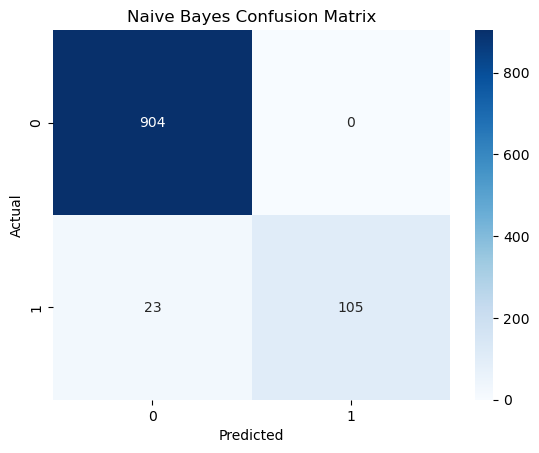

SVM Metrics:
Accuracy : 0.9786821705426356
Precision: 0.9732142857142857
Recall   : 0.8515625
F1 Score : 0.9083333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.97      0.85      0.91       128

    accuracy                           0.98      1032
   macro avg       0.98      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032



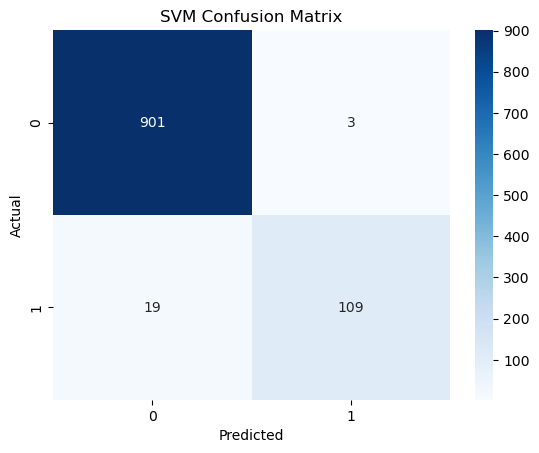

In [20]:
evaluate_model("Naive Bayes", y_test, nb_preds)
print("="*80)
evaluate_model("SVM", y_test, svm_preds)